# 1. Gaussian Mixture Models

In [ ]:
# Generalizatioin of K-means.
# When the clusters can be thought of made of different gausssian random variables
# It is more about finding the probability distribution rather than a clustering problem as such.
# Better than K-Means, as can find the elliptical cluster also.

# Assumptions is that underlying pattern is based on multiple gaussian distribution
# It is also called expectation maximization model

# Em - assign data to cluster with some probability
# gives probability model of x (generative)

In [3]:
# Recall K-Means clsutering is hard clustering naturally.
# We use some modifications on that to make it more probability based.
# Also, we know that in soft clustering, a point is associated with each cluster with some probability.
# cluster overlap

# MIXTURE MODELS - a probabilistic sound way of doing soft clustering.
# GMM - each cluster corresponds to a generative model or probability distribution
# parameters - what we want to discover using EM algo are parameters of each probability distribution
# In case of gaussian MM we try to find the mean and covariance of each distribution

# EM algo - automatically discover all parameters for the "K" sources

# 1D GMM
# for k = 2 gaussian, means we have two distributions in 1 dimenionsion
# If we know which point came from which one, we can calculate the mu and sigma.
# How to estimate the parameters when we dont know the labels of data?
# if we know the mean and sigma of each distribution then using joint probability we can tell the which point is associated with
# which parameter
# ================

# Expectation Maximization - 1D
# starts with two randomly placed gaussians (mu_a, s_a) and (mu_b, s_b)
# then for eah point xi, we calculate p(b|xi) = does it came from b ? - SOFT clustering
# then adjust (mu_a, s_a) and (mu_b, s_b) to fit the points assigned to them - this part is similar to k-means

In [4]:
# EM : how it works
# lets suppose we are having data from two gaussian clouds - a and b
# p(x_i | b) is probability distribution of cluster b - which we dont know but it will look like the equation of normal 
# distribution - assuming we are talking about GMM
# but we are interested in bi = p(b | xi) which is equal to ( p(xi | b) * p(b) ) / (p(xi|b)*p(b) + p(xi|a)*p(a))
# also, ai = 1 - bi
# mu_b = ( b1*x1 + b2*x2 + ...... + bn*xn ) / ( b1 + b2 + .... + bn) - for k-means, these means will either be 0 or 1
# in k-means one point contributs to only one mean, but in GMM, each point cntributes to all the points. THe contribution amount
# will be more for the centroid for which its has more weight 
# s^2_b= ( b1*(xi-mu_n)^2 + ...... + bn*(xn-mu_n)^2 ) / ( b1 + b2 + .... + bn)

# same thing to do for each of a also


# in GMM also , we have to give number of clsuters

# k-means naturally expects the data where all the cluster have same number of data points - IMP

In [ ]:
# multivariate normal distribution - when the linear combination of attributes (x1, x2, x3, ...., xd) comes from a 
# normal distribution 

# Equivalently, multivariate distributions can be viewed as a linear transformation of a collection of independent standard 
# normal random variables



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from scipy.stats import multivariate_normal

In [6]:
multivarite_normal?

Object `multivarite_normal` not found.


In [19]:
def gmm(X, K, max_iter=20, smoothing=1e-2):
    # getting the shape of data 
    N, D = X.shape
    
    # mean vector
    M = np.zeros((K, D))
    
    # Responsibility matrix, has K dimensions
    R = np.zeros((N, K))
    
    # covariance matrix 
    # this is covariance for all the k clusters. 
    # since covariance itself is 2d matrix, below is 3d matrix
    C = np.zeros((K, D, D))
    
    # uniform proportion across all the categories or clusters
    # one D
    # uniform
    pi = np.ones(K) / K
    
    # initializing the means to random points in the dataset itself
    for k in range(K):
        # Setting the Means. Its totally random. Might get into intialization problem
        # food for thought: we can actually run hard k-means to initialize centers  
        M[k] = X[np.random.choice(N)]
        
        # what is it ?
        # covariance matrix the value is one
        # initialize the covariance
        C[k] = np.eye(D)
    
    
    lls = []
    # We will use this to store the PDF value of sample n and gaussian k
    weighted_pdfs = np.zeros((N, K))
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # calculating the probabilities of a point being into one of the classes
        for k in range(K):
            # calculating the pdfs for each data point given mean and covariance
            weighted_pdfs[:,k] = pi[k]*multivariate_normal.pdf(X, M[k], C[k])
        # calculating the Responsibility matrix by noralizing the pdfs so that their sum become 1
        R = weighted_pdfs / weighted_pdfs.sum(axis=1, keepdims=True)
        
        
        # Step 2: recacluating the params, mu and cov
        for k in range(K):
            # calculating the proportion for each of the clusters 
            Nk = R[:, k].sum()
            
            pi[k] = Nk / N
            # calculating the mean gain
            M[k] = R[:, k].dot(X) / Nk
            
            # NxD
            delta = X - M[k]
            Rdelta = np.expand_dims(R[:, k], -1) * delta # multiplies R[:,k] by each col. of delta - N x D
            # to avoid singular matrices we are adding diagonal matrix with some smoothing
            C[k] = Rdelta.T.dot(delta) / Nk + np.eye(D)*smoothing # D x D
            
        # log likelihood
        ll = np.log(weighted_pdfs.sum(axis=1)).sum()
        lls.append(ll)
        if i > 0:
            if np.abs(lls[i] - lls[i-1]) < 0.1:
                break
        
    plt.plot(lls)
    plt.title("Log-Likelihood")
    plt.show()
    
    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors, edgecolor="black")
    plt.show()

    print("pi:", pi)
    print("means:", M)
    print("covariances:", C)
    return R    

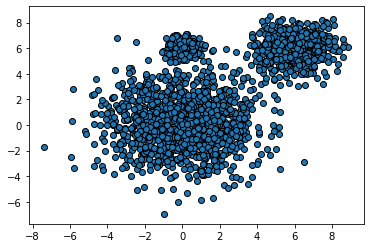

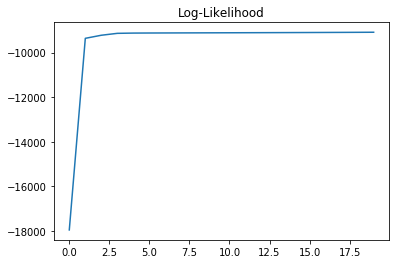

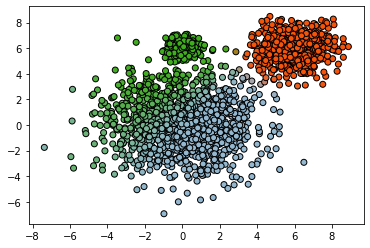

pi: [0.29964    0.47054648 0.22981352]
means: [[ 6.0020031   5.95309505]
 [ 0.41115991 -0.39458795]
 [-0.91090937  3.57229408]]
covariances: [[[1.04649455 0.02762838]
  [0.02762838 0.99500561]]

 [[3.62934783 0.51002968]
  [0.51002968 3.25143286]]

 [[2.2225465  2.49833047]
  [2.49833047 6.74376318]]]


array([[4.10920483e-20, 9.99881429e-01, 1.18571362e-04],
       [6.58568915e-19, 9.99983578e-01, 1.64224154e-05],
       [5.97226725e-11, 9.60918022e-01, 3.90819781e-02],
       ...,
       [2.63183639e-09, 5.68265624e-03, 9.94317341e-01],
       [3.68442263e-06, 2.39529379e-03, 9.97601022e-01],
       [9.80612874e-08, 8.99043163e-03, 9.91009470e-01]])

In [34]:
# assume 3 means
D = 2 # so we can visualize it more easily
s = 6 # separation so we can control how far apart the means are
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

# WILL THIS DATA WORK WELL WITH K-MEANS ?
N = 2000 # number of samples
X = np.zeros((N, D))
X[:1200, :] = np.random.randn(1200, D)*2 + mu1
X[1200:1800, :] = np.random.randn(600, D) + mu2
X[1800:, :] = np.random.randn(200, D)*0.5 + mu3

# what does it look like without clustering?
plt.scatter(X[:,0], X[:,1], edgecolor="black")
plt.show()

K = 3
gmm(X, K)

In [35]:
# GMM has singular covariance problem - we divide by covariance in gaussian formula
# if covariance is very very small, then inverse would go to infinity.
# another problem is local minima

# Solution - to have diagonal covariance - reduces singularity problem and faster calculation 
# TO have diagonal matrix means, each attribute is independent of other attribute.
# this acts as sort of regularization also or smoothing

# we cn take single 1d array as variance over all the data in all dimensions
# even faster cimputationally.
# very stupid assumtpion but tend to work fine in rela world.

#we can also use shared covariance - same covarianace across clusters

In [36]:
# KERNEL DENSITY ESTIMATION
# just a fitting of proability disb. with kernels

# what is the easiest method of density estimation 
# HISTOGRAM

# but GMM is also a type of kernel density estimation technique - fitting disb.